# Neural Networks

## Learning Objectives

At the end of the experiment, you will be able to

* Get introduced to PyTorch and it's usage
* Apply neural networks to regression problems
* Learn about image classification tasks
* Understand & build Dense Neural Network  model class in PyTorch
* Train and test the model in PyTorch
* Understand the concept of transfer learning and pre-trained models

### Introduction

Artificial Neural Network (ANN) is a Machine Learning model inspired by the networks of biological neurons found in our brains.

#### Artificial Neurons

Modeled after human brain activity, artificial neurons are digital constructs that simulate the behavior of biological neurons in some ways. The first computational model of an (artificial) neuron was proposed by Warren McCulloch (neuroscientist) and Walter Pitts (logician) in 1943.

As shown below, it may be divided into 2 parts. The first part, g takes an input, performs aggregation, and based on the aggregated value, the second part, f, makes a decision. Understand further through an example 'Watch a football game' in this [article](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1).

<br><br>
<center>
<img src="https://miro.medium.com/max/369/1*fDHlg9iNo0LLK4czQqqO9A.png" width= 320px/>
</center>

<br><br>


### Install the required packages

In [1]:
# This line is a command typically used in a Jupyter notebook or similar environment to install a Python package.
#
# 1. '!' - This exclamation mark is specific to Jupyter notebooks. It allows you to run shell commands directly 
#    from a notebook cell. In other environments, this would not be necessary.
#
# 2. 'pip' - This is the package installer for Python. It's a command-line tool used to install and manage 
#    Python packages.
#
# 3. 'install' - This is a pip command that tells pip to install a package.
#
# 4. 'torchsummary' - This is the name of the package being installed. torchsummary is a Python library that 
#    provides a summary of PyTorch models, including the number of parameters and the size of the output for 
#    each layer.

# Note: The space between '!' and 'pip' is optional and doesn't affect the command's functionality. Both 
# '!pip install torchviz' and '! pip install torchviz' will work the same way in Jupyter environments.

# Rund the next two lines

# !pip install torchsummary
# ! pip install torchviz

### Import required packages

In [2]:
# Importing torch packages
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary
import torchvision.models as models
from torchviz import make_dot  #visualize computational graph

# Importing other packages
import numpy as np # A fundamental package for scientific computing in Python.
import pandas as pd # A library providing high-performance, easy-to-use data structures and data analysis tools.
import matplotlib.pyplot as plt # A plotting library for creating static, animated, and interactive visualizations.
import math # A library providing mathematical functions and constants.

# Detailed explanation:
#
# PyTorch-related imports:
# - torch.nn: Contains neural network layers and loss functions.
# - torch.nn.functional: Provides functions for neural network operations.
# - torch.optim: Includes optimization algorithms for training neural networks (e.g., SGD, Adam).
# - torch: The core PyTorch library for tensor computations and automatic differentiation.
# - torchvision: A package with popular datasets, model architectures, and image transformations for computer vision.
# - torchsummary.summary: A utility to print a summary of a PyTorch model, showing layer shapes and parameter counts.
# - torchvision.models: Provides access to pretrained model architectures.
# - torchviz.make_dot: Used to visualize the computational graph of PyTorch models.

* Import pytorch, the deep learning library which will be used in the assignment, and torchvision, which provides the dataset and data transformations.

* import torch.nn (pytorch’s neural network library), torch.nn.functional (includes non-linear functions like ReLu and sigmoid) and torch.optim for implementing various optimization algorithms.

# 1.Introduction to PyTorch

PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab (FAIR). It provides a flexible and intuitive platform for building, training, and deploying deep learning models. PyTorch is widely used in both academia and industry due to its dynamic computation graph, ease of use, and robust support for GPU acceleration.

### Why PyTorch?

1. **Ease of Use and Flexibility**:
   - PyTorch's dynamic computation graph and Pythonic nature make it intuitive and easy to use, especially for researchers and developers who prefer interactive and imperative programming.
   - The ability to modify the computation graph on-the-fly allows for more flexibility in model design and experimentation.

2. **Strong GPU Support**:
   - PyTorch provides seamless integration with CUDA, enabling efficient utilization of GPU resources for accelerated computation.
   - Multi-GPU support and distributed training capabilities allow for scaling up models and training on large datasets.

3. **Community and Support**:
   - PyTorch has a large and active community, contributing to a wealth of tutorials, code examples, and pre-trained models.
   - Continuous updates and improvements from both the open-source community and Facebook AI Research ensure that PyTorch stays at the cutting edge of deep learning technology.

4. **Interoperability**:
   - PyTorch's support for ONNX (Open Neural Network Exchange) allows for easy model export and interoperability with other frameworks and platforms.
   - This makes it convenient to deploy PyTorch models in various production environments.

5. **Debugging and Prototyping**:
   - The dynamic nature of PyTorch makes it easier to debug and prototype models. Developers can use standard Python debugging tools to inspect and modify the computation graph.
   - The interactive experience provided by Jupyter notebooks and other IDEs is enhanced by PyTorch’s immediate execution model.

6. **Research and Innovation**:
   - PyTorch's flexibility and ease of use make it a popular choice among researchers for developing and testing new ideas.
   - Many cutting-edge research papers and innovations in the field of deep learning are implemented and shared using PyTorch.
   - As of June 2024, [PyTorch is the most used deep learning framework on Papers With Code](https://paperswithcode.com/trends).

### Overview of PyTorch

1. **Dynamic Computation Graphs (Define-by-Run)**:
   - PyTorch uses dynamic computation graphs, which are constructed on-the-fly as operations are performed. This is in contrast to static computation graphs used by frameworks like TensorFlow (prior to TensorFlow 2.0).
   - PyTorch defines a computational graph as a Directed Acyclic Graph (DAG) where nodes represent operations (e.g., addition, multiplication, etc.) and edges represent the flow of data between the operations. Learn more about DAG [here](https://www.geeksforgeeks.org/computational-graph-in-pytorch/).
   - The dynamic nature allows for more flexibility and ease of debugging, as the graph is built dynamically during runtime.

2. **Tensor Library**:
   - PyTorch's tensor library is similar to NumPy but with strong GPU acceleration.
   - Tensors are the fundamental building blocks in PyTorch, representing multi-dimensional arrays.

3. **Autograd**:
   - PyTorch's automatic differentiation engine, Autograd, enables automatic computation of gradients. This is essential for training neural networks using gradient-based optimization algorithms. More information about `Autograd` graph execution can be found [here](https://pytorch.org/blog/how-computational-graphs-are-executed-in-pytorch/).
   - Autograd records operations performed on tensors to create a computation graph and compute gradients during backpropagation.

4. **Modules and nn.Module**:
   - PyTorch's `nn` module provides a high-level interface for building neural networks. The `nn.Module` class is a base class for all neural network modules.
   - Layers, loss functions, and optimizers are provided within the `nn` module, facilitating the construction of complex neural networks.

5. **Extensive Ecosystem**:
   - PyTorch has a rich ecosystem, including libraries like torchvision (for computer vision), torchaudio (for audio processing), and torchtext (for natural language processing).
   - Integration with other tools such as TensorBoard for visualization and ONNX for model export enhances its utility.



#### Tensor Operations

In [3]:
# Creating a tensor
x = torch.tensor([[1, 2], [3, 4]])
print(x)

tensor([[1, 2],
        [3, 4]])


In [4]:
# Tensor operations
y = torch.ones(2, 2)
print(y)

z = x + y
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 3.],
        [4., 5.]])


We now illustrate GPU acceleration.

In [5]:
import time

# Function to measure execution time
def measure_time(func):
    start = time.time()
    func()
    end = time.time()
    return end - start

# PyTorch operations
def pytorch_operations():
    # Check if CUDA (GPU) is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Create a large tensor on the appropriate device
    x = torch.randn(10000, 10000, device=device)
    
    # Perform matrix multiplication
    result = torch.matmul(x, x.t())
    
    # Ensure computation is complete (important for GPU operations)
    if device.type == "cuda":
        torch.cuda.synchronize()

# NumPy operations (CPU-only)
def numpy_operations():
    # Create a large NumPy array
    x = np.random.randn(10000, 10000)
    
    # Perform matrix multiplication
    result = np.dot(x, x.T)

# Run and time the operations
pytorch_time = measure_time(pytorch_operations)
numpy_time = measure_time(numpy_operations)

print(f"PyTorch execution time: {pytorch_time:.4f} seconds")
print(f"NumPy execution time: {numpy_time:.4f} seconds")

if torch.cuda.is_available():
    print("GPU acceleration was used for PyTorch")
    print(f"Speedup: {numpy_time / pytorch_time:.2f}x")
else:
    print("GPU acceleration was not available, both ran on CPU")

PyTorch execution time: 2.2026 seconds
NumPy execution time: 5.9571 seconds
GPU acceleration was used for PyTorch
Speedup: 2.70x


In [6]:
import numpy as np

x_np = np.array([[1., 2.], [3., 4.]])

print(x_np)

[[1. 2.]
 [3. 4.]]


In [7]:
# Create a random tensor of a size
x = torch.rand(size=(3,4))  # full precision

# datatype
x.dtype

torch.float32

In [8]:
# Specify datatype of the tensor

x = torch.tensor([3.0, 6.0, 9.0],
                 dtype=torch.float16) #half precision

x.dtype

torch.float16

In [9]:
# Tensor operations

# Addition

A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

# YOUR CODE HERE for element wise addition, subtraction and multiplication
Sum = A + B
print("Sum = ", Sum)

Difference = B - A
print("Difference = ", Difference)

Element_mult = A * B
print("Element wise multiplication = ", Element_mult)

# Multiplication will not work as matrices are not compatible.

Sum =  tensor([[ 8., 12.],
        [11., 15.],
        [14., 18.]])
Difference =  tensor([[6., 8.],
        [5., 7.],
        [4., 6.]])
Element wise multiplication =  tensor([[ 7., 20.],
        [24., 44.],
        [45., 72.]])


In [10]:
# Define A and B such that matrix multiplication can take place

B_T = B.T
print(B_T)

F = torch.matmul(A, B_T)
print("Multiplication = ", F)

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Multiplication =  tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


#### Autograd

In [11]:
# Autograd Example
# Create tensors with requires_grad=True to enable automatic differentiation

x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
y = torch.tensor([[5., 6.], [7., 8.]], requires_grad=True)

print("x = ", x)
print("y = ", y)

# Explanation:

# 1. We create two 2x2 tensors, x and y, using torch.tensor().
#    - The values are provided as nested lists, representing 2D tensors.
#    - We use floating-point numbers (indicated by the decimal points) because 
#      autograd typically works with float tensors.
#
# 3. The key parameter here is 'requires_grad=True':
#    - This flag tells PyTorch to track all operations performed on these tensors.
#    - When set to True, PyTorch builds a computational graph, allowing it to 
#      compute gradients with respect to these tensors later.
#    - This is crucial for training neural networks, as it enables automatic 
#      computation of gradients during backpropagation.

# Note: At this point, no computations have been performed. We've only set up the 
# tensors with autograd enabled. To see autograd in action, we would need to perform 
# some operations on these tensors and then call .backward() on a resulting scalar tensor.

x =  tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
y =  tensor([[5., 6.],
        [7., 8.]], requires_grad=True)


In [12]:
# Computation
z = x + y
print(z)

tensor([[ 6.,  8.],
        [10., 12.]], grad_fn=<AddBackward0>)


In [13]:
# Computing gradients
t = torch.sum(z) # sums all elements in z
print("t = sum(z) =", t)
t.backward()

# Accessing and printing gradients
print("Gradient of x:")
print(x.grad)
print("Gradient of y:")
print(y.grad)

# 1. Computation:
#    - We perform element-wise addition of x and y: z = x + y
#    - This operation is tracked in the computational graph because x and y have requires_grad=True
#
# 2. Computing gradients:
#    - We compute the sum of all elements in z: t = torch.sum(z)
#    - t is a scalar (single value) tensor, which is required for calling .backward()
#    - t.backward() computes the gradients of t with respect to all tensors in its computational graph 
#      that have requires_grad=True (in this case, x and y)
#
# 3. Accessing gradients:
#    - After calling t.backward(), the gradients are stored in the .grad attribute of the tensors
#    - We print x.grad and y.grad to see these gradients
#
# In this simple example:
#    - The gradient of t with respect to each element of x and y will be 1
#    - This is because increasing any element of x or y by 1 would increase t by 1
#    - The gradient tensor has the same shape as the original tensor

t = sum(z) = tensor(36., grad_fn=<SumBackward0>)
Gradient of x:
tensor([[1., 1.],
        [1., 1.]])
Gradient of y:
tensor([[1., 1.],
        [1., 1.]])


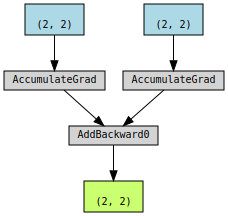

In [14]:
make_dot(z) #visualize the computational graph

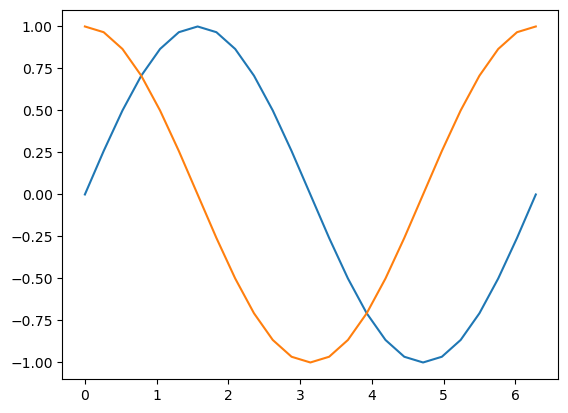

In [15]:
# Another example
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
c = torch.sin(a)
d = torch.cos(b)

e = c + d
f = e.sum()

plt.plot(a.detach().numpy(), c.detach().numpy(), label='sin(a)')
plt.plot(b.detach().numpy(), d.detach().numpy(), label='cos(b)')


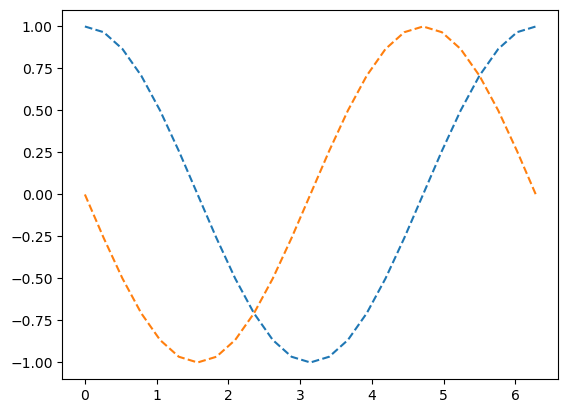

In [16]:
# Perform backpropagation to compute gradients
f.backward()  # Compute the gradients of f with respect to a and b

# Plotting the gradients of e with respect to a and b

# Accessing the gradients of a and b
grad_a = a.grad  # Gradient of 'e' with respect to 'a'
grad_b = b.grad  # Gradient of 'e' with respect to 'b'

# Plotting the gradients
plt.plot(a.detach().numpy(), grad_a.detach().numpy(), label='Gradient of e w.r.t. a', linestyle='--') # Gradient of 'e' with respect to 'a' is 'cos(a)'
plt.plot(b.detach().numpy(), grad_b.detach().numpy(), label='Gradient of e w.r.t. b', linestyle='--') # Gradient of 'e' with respect to 'b' is '-sin(b)'

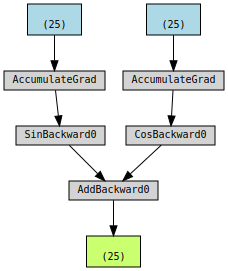

In [17]:
make_dot(e)

#### Accessing and performing operations in GPU

In [18]:
!nvidia-smi #view current running processes in GPU

Mon Sep  2 20:37:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P3              18W /  30W |    876MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [19]:
torch.cuda.is_available() # Is GPU available?

True

In [20]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
torch.cuda.device_count() # Number of GPUs available

1

In [22]:
# By default, torch.tensor() creates tensors on the CPU

x = torch.tensor([1, 2, 3])

# Print the tensor to see its contents
print(x)
# Print the device to confirm it's on CPU
# Expected output: cpu
print(x.device)


# Move tensor to GPU (if available)
x_gpu = x.to(device)

# Print the GPU tensor to see its contents
print(x)

# If a GPU is available, this tensor will be on the GPU
# If not, it will remain on the CPU
print(x_gpu)

tensor([1, 2, 3])
cpu
tensor([1, 2, 3])
tensor([1, 2, 3], device='cuda:0')


### Implement Dense Neural Network using PyTorch

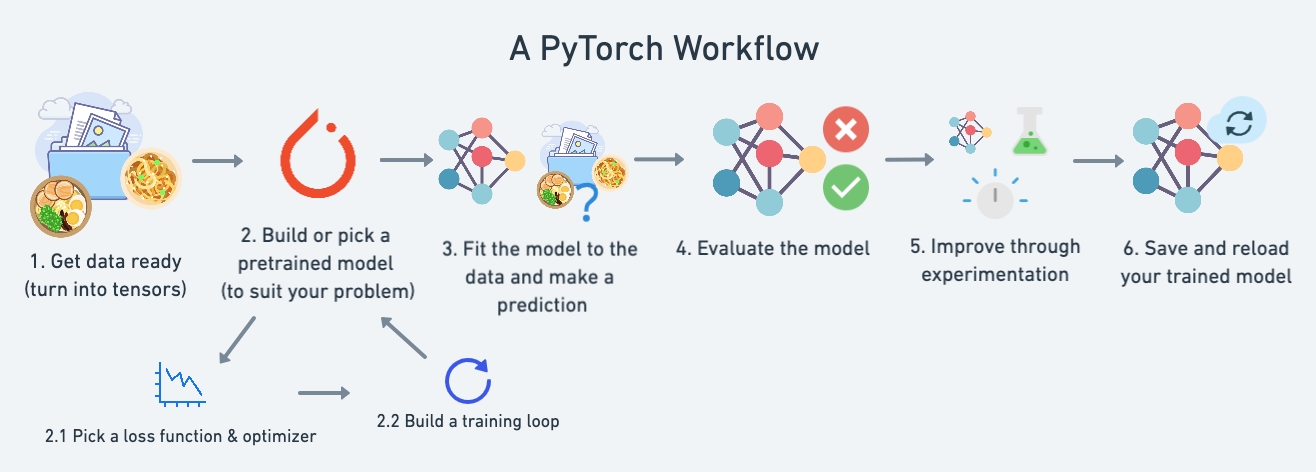

### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **Neurons**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The Neurons computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single Neuron can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

# 2.Univariate Linear Regression

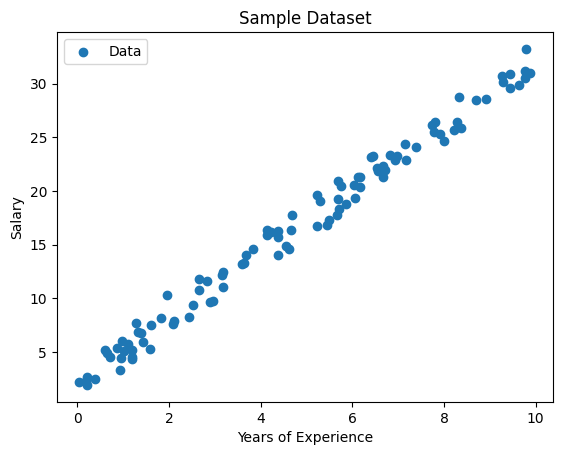

### Create the sample data

In [23]:
# Generating a sample dataset
np.random.seed(0)
X_uni = np.random.rand(100, 1) * 10  # Years of experience (between 0 and 10)
y_uni = 3 * X_uni + 2 + np.random.randn(100, 1)  # Salary, with some noise

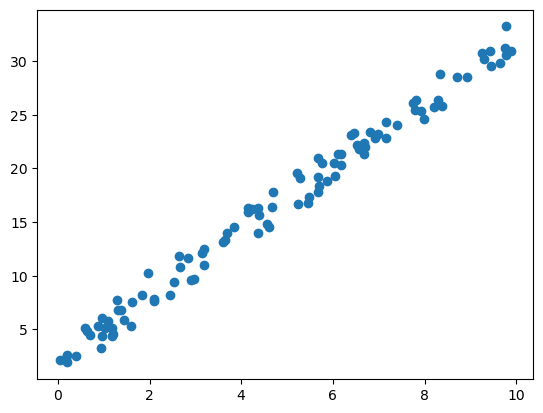

In [24]:
# Visualizing the data
plt.scatter(X_uni, y_uni)

In [25]:
# Convert the data to PyTorch tensors
X_uni_tensor = torch.tensor(X_uni, dtype=torch.float32)
y_uni_tensor = torch.tensor(y_uni, dtype=torch.float32)

In [26]:
# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    # Constructor for the LinearRegressionModel class
    def __init__(self):
        # Call the constructor of the parent class (nn.Module)
        super(LinearRegressionModel, self).__init__()
        # Create a linear layer with 1 input feature and 1 output
        # This represents the equation y = mx + b
        self.linear = nn.Linear(1, 1)

    # Define the forward pass of the model
    def forward(self, x):
        # Apply the linear transformation to the input x
        # This computes the prediction y = mx + b
        return self.linear(x)

# Detailed explanation:
# 
# 1. Class definition:
#    - This class defines a simple linear regression model.
#    - It inherits from nn.Module, which is PyTorch's base class for all neural network modules.
#
# 2. Constructor (__init__ method):
#    - Initializes the model by setting up its layers.
#    - super().__init__() calls the constructor of nn.Module to properly initialize the model.
#    - self.linear = nn.Linear(1, 1) creates a linear layer:
#      - The first '1' indicates one input feature.
#      - The second '1' indicates one output value.
#      - This layer learns two parameters: weight (m) and bias (b).
#
# 3. Forward method:
#    - Defines how input data is passed through the model.
#    - Takes an input tensor x and applies the linear transformation.
#    - The computation performed is essentially y = mx + b, where m and b are learned.
#
# Purpose:
# - This model represents a simple linear regression, suitable for problems where
#   the relationship between input and output can be approximated by a straight line.
# - It can be used for basic prediction tasks with a single input feature.

# Note:
# - This implementation assumes the use of PyTorch (import torch.nn as nn)
# - The model processes one-dimensional input and produces one-dimensional output.
# - For multi-feature inputs or multi-dimensional outputs, the nn.Linear parameters
#   would need to be adjusted accordingly.

In [27]:
# Create an instance of the model

linear_reg_model = LinearRegressionModel()

In [28]:
# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(linear_reg_model.parameters(), lr=0.01)

#  Detailed explanation:

# 1. Loss Function (criterion):
#    criterion = nn.MSELoss()
#    - This line creates an instance of the Mean Squared Error (MSE) loss function.
#    - MSE is a common loss function for regression problems.
#    - It calculates the average squared difference between the predicted and actual values.
#    - Formula: MSE = (1/n) * Σ(y_pred - y_actual)^2, where n is the number of samples.
#    - MSE punishes larger errors more severely due to the squaring operation.

# 2. Optimizer:
#    optimizer = optim.SGD(regression_model.parameters(), lr=0.01)
#    - This line creates an instance of the Stochastic Gradient Descent (SGD) optimizer.
#    - SGD is a first-order iterative optimization algorithm for finding the minimum of a function.
#
#    Parameters:
#    a) regression_model.parameters(): 
#       - This passes all learnable parameters of the model to the optimizer.
#       - In this case, it includes the weights and biases of the linear layer.
#
#    b) lr=0.01:
#       - This sets the learning rate to 0.01.
#       - The learning rate determines the step size at each iteration while moving toward a minimum of the loss function.
#       - A smaller learning rate may lead to more precise convergence but slower training.
#       - A larger learning rate may speed up training but risk overshooting the minimum.

# Purpose:
# - The loss function (criterion) is used to measure how well the model's predictions match the actual values.
# - The optimizer is used to update the model's parameters in a way that minimizes the loss function.

# Usage in training loop:
# 1. Forward pass: Compute predictions using the model.
# 2. Compute loss: Use criterion to calculate loss between predictions and actual values.
# 3. Backward pass: Compute gradients of the loss with respect to model parameters.
# 4. Optimization step: Use optimizer to update model parameters based on computed gradients.

In [29]:
# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    linear_reg_model.train()
    optimizer.zero_grad()  # Zero the gradients
    outputs = linear_reg_model(X_uni_tensor)  # Forward pass
    loss = criterion(outputs, y_uni_tensor)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#  Detailed explanation:

# 1. Setting up the training loop:
#    - num_epochs = 1000: This sets the total number of times we'll train on the entire dataset.
#    - for epoch in range(num_epochs): This loop iterates through each epoch.

# 2. Training steps for each epoch:
#    a) regression_model.train():
#       - Sets the model to training mode, which enables operations like dropout (if used).
#    
#    b) optimizer.zero_grad():
#       - Resets the gradients of all parameters to zero.
#       - This is necessary because PyTorch accumulates gradients by default.
#    
#    c) outputs = regression_model(X_uni_tensor):
#       - Forward pass: The input data is passed through the model to get predictions.
#       - X_uni_tensor is assumed to be the input features tensor.
#    
#    d) loss = criterion(outputs, y_uni_tensor):
#       - Computes the loss by comparing the model's outputs to the actual target values.
#       - y_uni_tensor is assumed to be the target values tensor.
#    
#    e) loss.backward():
#       - Backward pass: Computes the gradient of the loss w.r.t. each parameter.
#    
#    f) optimizer.step():
#       - Updates the parameters based on the computed gradients and the optimization algorithm (SGD in this case).

# 3. Monitoring progress:
#    - if (epoch+1) % 100 == 0:
#      This condition is true every 100 epochs.
#    - print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
#      Prints the current epoch number and the loss value.
#      loss.item() extracts the scalar value from the loss tensor.

# Note:
# - This code assumes that X_uni_tensor and y_uni_tensor have been properly defined and contain the training data.
# - The model (regression_model), loss function (criterion), and optimizer have been set up prior to this training loop.
# - This implementation trains on the entire dataset in each epoch. For larger datasets, you might want to use mini-batch training.
# - The number of epochs (1000) is arbitrary and may need adjustment based on your specific dataset and model convergence.

Epoch [100/1000], Loss: 1.1135
Epoch [200/1000], Loss: 1.0343
Epoch [300/1000], Loss: 1.0069
Epoch [400/1000], Loss: 0.9974
Epoch [500/1000], Loss: 0.9942
Epoch [600/1000], Loss: 0.9930
Epoch [700/1000], Loss: 0.9926
Epoch [800/1000], Loss: 0.9925
Epoch [900/1000], Loss: 0.9925
Epoch [1000/1000], Loss: 0.9924


In [30]:
# Making predictions
linear_reg_model.eval()
with torch.no_grad():
    y_pred_tensor = linear_reg_model(X_uni_tensor)

# Detailed explanation:

# 1. Setting the model to evaluation mode:
#    regression_model.eval()
#    - This sets the model to evaluation mode.
#    - In evaluation mode, certain model behaviors change:
#      a) Dropout layers (if any) stop dropping out units.
#      b) Batch Normalization layers (if any) use running statistics instead of batch statistics.
#    - Even for simple models like this linear regression, it's good practice to use eval() mode for consistency.

# 2. Disabling gradient computation:
#    with torch.no_grad():
#    - This context manager disables gradient calculation.
#    - Benefits:
#      a) Reduces memory usage, as no intermediate values are saved for backward pass.
#      b) Speeds up computation, as no gradient-related calculations are performed.
#    - This is crucial for inference (making predictions) as we don't need to compute gradients when we're not training.

# 3. Making predictions:
#    y_pred_tensor = regression_model(X_uni_tensor)
#    - This line passes the input data (X_uni_tensor) through the model to get predictions.
#    - The output (y_pred_tensor) contains the predicted values for each input in X_uni_tensor.
#    - For a linear regression model, this computes y = mx + b for each x in X_uni_tensor.

# Note:
# - X_uni_tensor is assumed to be the tensor containing the input features for which we want predictions.
# - The resulting y_pred_tensor will have the same number of elements as X_uni_tensor.
# - This code assumes that the model has been trained previously.
# - For a linear regression model, predictions can be made on data outside the training range, 
#   but be cautious about extrapolating too far from the training data.

# Use of predictions:
# - These predictions can be used for various purposes such as:
#   a) Visualizing the model's fit to the data
#   b) Computing performance metrics (e.g., R-squared, Mean Absolute Error)
#   c) Making business decisions based on the model's outputs

In [31]:
# Convert predictions to numpy array
y_pred = y_pred_tensor.detach().numpy()

In [32]:
# Printing the model coefficients

# Accessing the learned parameters
weight = linear_reg_model.linear.weight.item()
bias = linear_reg_model.linear.bias.item()

print(f'Weight: {weight:.4f}, Bias: {bias:.4f}')

Weight: 2.9946, Bias: 2.2166


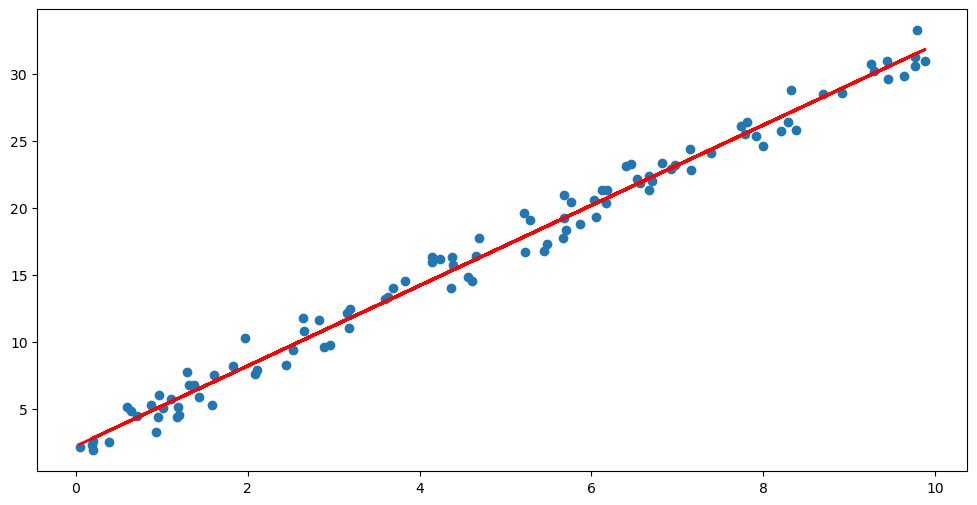

In [33]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_uni, y_uni, label='Actual data')
plt.plot(X_uni, y_pred, color='red', linewidth=2, label='Fitted line')

A basic neural network architecture consists of an input layer, one or more hidden layers, and an output layer. The input layer receives the raw data, with each neuron representing a feature. Hidden layers contain neurons that process inputs using learned weights and biases, applying an activation function (like ReLU or sigmoid) to introduce non-linearity. The output layer produces the final prediction, with neurons corresponding to the output classes (for classification) or a single neuron (for regression). The network learns by adjusting weights and biases to minimize a loss function using backpropagation and an optimization algorithm like gradient descent.

## Initializing CUDA

CUDA is used as an interface between the code and the GPU.

Normally, the code is run in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [34]:
# To test whether GPU instance is present in the system or not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.4.0+cu121 CUDA: True


If it's False, then the program is executed on CPU. If it's True, then the program is executed on GPU.

Initialize some GPU-related variables:

In [35]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# 3.Multivariate Classification

### Dataset Description

The MNIST digits dataset is a widely used benchmark in machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits, ranging from 0 to 9. Each image is 28x28 pixels, resulting in a total of 784 features per image. The dataset is split into 60,000 training images and 10,000 test images. Each image is labeled with the correct digit, making it a supervised learning dataset. MNIST is commonly used for training and testing image classification algorithms, particularly in the fields of neural networks and deep learning.

## Load MNIST data

Load the MNIST data. It can take a while.


* Load both the training set and the testing sets

* Use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize().

In [36]:
# Data preparation for MNIST dataset

# Define data transformations

transform = transforms.Compose([
    transforms.ToTensor(), # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,)), # Normalize the pixel values with mean = 0.5 and std = 0.5
    ])

# Load and prepare the MNIST training dataset

mnist_trainset = datasets.MNIST(
    root='./data', # Specify the download path
    train=True, # Specify training set
    download=True, # Download the dataset if not present
    transform=transform # Apply the defined transformations
    )

# Create a DataLoader for the training set

train_loader = torch.utils.data.DataLoader(
    mnist_trainset, # Load the MNIST training set 
    batch_size=10, # Define the batch size (number of samples in each batch)
    shuffle=True # Shuffle the data
    )

# Load and prepare the MNIST test dataset

mnist_testset = datasets.MNIST(
    root='./data', # Path where the dataset is stored 
    train=False, # Load the test set 
    download=True, # Download the dataset if not present
    transform=transform # Apply the defined transformations
    )

# Create a DataLoader for the test set

test_loader = torch.utils.data.DataLoader(
    mnist_testset, # Load the MNIST test set 
    batch_size=10, # Define the batch size (number of samples in each batch)
    shuffle=True # Shuffle the data
    )

# Explanation:
# 1. Data Transformation:
#    - ToTensor(): Converts PIL images to PyTorch tensors
#    - Normalize(): Normalizes tensor with mean=0.5 and std=0.5 for each channel
#
# 2. Dataset Loading:
#    - MNIST dataset is loaded for both training and testing
#    - 'root' specifies where to store the dataset
#    - 'download=True' ensures the dataset is downloaded if not present
#    - The same transform is applied to both training and test sets
#
# 3. DataLoader:
#    - Provides an iterable over the dataset
#    - 'batch_size=10' means it will yield batches of 10 images at a time
#    - 'shuffle=True' randomizes the order of samples in each epoch
#
# This setup prepares the MNIST dataset for training and testing a machine learning model,
# with appropriate preprocessing and batch loading capabilities.

When dealing with an image, text, audio, or video footage, one would use Python packages to load that data into a NumPy array and then convert the array into a tensor. Fortunately, PyTorch makes the process easier by offering a library called torchvision. This library provides useful tools such as data loaders, datasets, and data transformers for pixelated images.

### **Image Preprocessing with transforms.Compose**

When working with image data in deep learning, especially in PyTorch, preprocessing steps are essential to ensure the data is in the right format and range for the neural network.

Two common preprocessing steps are converting images to tensors and normalizing their pixel values. This section explains why these steps are necessary and how they are achieved using torchvision.transforms.

Why Preprocess Images?

1. Conversion to Tensors:

  * Neural networks in PyTorch require input data to be in the form of tensors. Tensors are the primary data structure in PyTorch, similar to arrays in NumPy but with added functionality for GPU acceleration.

  * Converting images to tensors ensures compatibility with PyTorch's neural network modules and allows efficient computation.


2. Normalization:

  * Normalizing images is a crucial step that helps in faster convergence during training. It scales the pixel values to a standardized range, which can lead to more stable and faster training.

  * Typically, pixel values of images range from 0 to 255. However, for neural networks, it's beneficial to have these values in a smaller range, often between -1 and 1.

  * Normalizing the data helps to ensure that each input feature (in this case, pixel values) has a similar distribution, which helps the neural network learn more effectively.

In [37]:
# Create a composition of transforms

transform = transforms.Compose([
    transforms.ToTensor(), # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,)), # Normalize the pixel values with mean = 0.5 and std = 0.5
    ])

# Detailed explanation:

# 1. transforms.Compose([...]):
#    - This creates a pipeline of transforms that will be applied in sequence.
#    - It allows us to chain multiple transformation operations together.

# 2. transforms.ToTensor():
#    - Converts a PIL Image or numpy.ndarray to a torch.FloatTensor.
#    - It scales the image's pixel values to be between 0 and 1.
#    - For MNIST (grayscale images), it results in tensors of shape (1, 28, 28).

# 3. transforms.Normalize((0.5,), (0.5,)):
#    - Normalizes the tensor image with mean and standard deviation.
#    - For each channel, it computes: image = (image - mean) / std
#    - Here, mean = 0.5 and std = 0.5 for the single channel (grayscale).
#    - This transforms the input to a range of [-1, 1], which often helps in training neural networks.

# Use case:
# - This transform will be applied to each image in the MNIST dataset.
# - It prepares the images for input into a neural network by:
#   a) Ensuring they are in tensor format.
#   b) Normalizing them to a standard range, which can improve training stability and speed.

# Note: The choice of mean=0.5 and std=0.5 is common for MNIST, 
# as it centers the data around zero with a range of [-1, 1].

**Let's break down each transformation:**

1. transforms.ToTensor():

  * Converts a PIL Image or NumPy ndarray to a PyTorch tensor.

  * Scales the pixel values from the range [0, 255] to [0.0, 1.0].

2. transforms.Normalize((0.5,), (0.5,)):

  * Normalizes the tensor image with a mean of 0.5 and a standard deviation of 0.5.
  * The formula used for normalization is:
  
$$ \text{normalized\_pixel} = \frac{\text{original\_pixel} - \text{mean}}{\text{std}} $$
  ​

  * Given the original pixel values are in [0.0, 1.0], normalizing with mean=0.5 and std=0.5 will transform these values to the range [-1.0, 1.0].

In [38]:
# Load and prepare the MNIST training dataset

mnist_trainset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
    )

# Create a DataLoader for the training set

train_loader = torch.utils.data.DataLoader(
    mnist_trainset, 
    batch_size=20, 
    shuffle=True
    )

# Load and prepare the MNIST test dataset

mnist_testset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
    )

# Create a DataLoader for the test set

test_loader = torch.utils.data.DataLoader(
    mnist_testset, 
    batch_size=20, 
    shuffle=True
    )

# Detailed explanation:

# 1. datasets.MNIST():
#    - Loads the MNIST dataset, which consists of handwritten digits (0-9).
#    - 'root' specifies where to store/find the data.
#    - 'train=True/False' distinguishes between training and test sets.
#    - 'download=True' ensures the dataset is available locally.
#    - 'transform' applies the preprocessing steps defined earlier.

# 2. torch.utils.data.DataLoader():
#    - Creates an iterable that returns batches of data.
#    - 'batch_size=20' means it will yield 20 images (and their labels) at a time.
#    - 'shuffle=True' randomizes the order of samples in each epoch, which is 
#      important for stochastic gradient descent methods.

# Use cases:
# - The train_loader is used during the training phase of a model, providing
#   batches of data for each training step.
# - The test_loader is used to evaluate the model's performance on unseen data,
#   typically after each epoch or at the end of training.

# Note: Using the same batch size for both train and test loaders is common
# for consistency, but not strictly necessary. The shuffle for the test set
# is often not needed unless you're doing multiple evaluations and want to
# avoid any potential bias from the order of samples.

Next, there is a training set, testing set, train loader, and test loader.

When working with large amounts of data, the DataLoader class is useful because it generates the data on multiple cores in real-time and directly feeds it into the deep learning model.

A DataLoader can be given a batch_size, which denotes the number of samples in each generated batch, and the shuffle parameter can be set to randomize the data sequence.

In [39]:
for (X_train, y_train) in train_loader:
    #check the size and type of training set
    print("Training set size: ", X_train.size())
    print("Training set type: ", X_train.dtype)
    break

Training set size:  torch.Size([20, 1, 28, 28])
Training set type:  torch.float32


The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training image. Here batch size is 20.


## Plotting the images

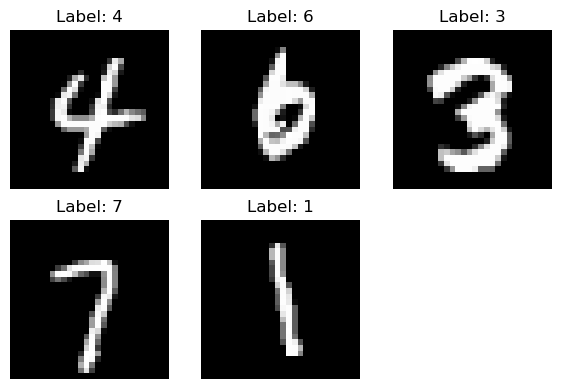

In [40]:
labels = []
features = []
for X, y in zip(X_train, y_train):
    # Getting unique labels
    if y not in labels:
        labels.append(y)
        features.append(X)

# This loop iterates through the training data (X_train) and labels (y_train)
# It collects unique labels and their corresponding features (images)
# labels: A list to store unique class labels
# features: A list to store one example image for each unique label

pltsize = 1
plt.figure(figsize=(7, 7))
# Create a new figure for plotting with a size of 7x7 inches

for i in range(5):
    plt.subplot(3, 3, i+1)
    # Create a 3x3 grid of subplots and select the (i+1)th subplot
    # This allows for up to 9 images, but we're only using 5 in this loop

    plt.axis('off')
    # Turn off the axis labels and ticks for a cleaner look

    # Convert the tensor to numpy for displaying the image
    plt.imshow(features[i].numpy().reshape(28, 28), cmap="gray")
    # Display the image:
    # - features[i]: Select the i-th feature (image) from our collected unique samples
    # - .numpy(): Convert the PyTorch tensor to a NumPy array
    # - .reshape(28, 28): Reshape the 1D array to a 28x28 2D array (assuming MNIST-like images)
    # - cmap="gray": Use a grayscale colormap for the image

    plt.title(f'Label: {labels[i]}')
    # Set the title of the subplot to show the corresponding label

# This loop creates a visual display of the first 5 unique classes in the dataset
# It shows one example image for each class along with its label

### Dense Neural Network Classifiers

Dense Neural Networks can be used for classification and regression tasks. In classification, they can perform (i) Binary Classification (ii) Multilabel Binary Classification, and (iii) Multiclass classification

* **Binary classification:** Used when there are only two distinct classes and the data we want to classify belongs exclusively to one of those classes, e.g. classifying if a review sentiment is positive or negative.

* **Multilabel binary classification:** Used when there are two or more classes and the data we want to classify belongs to none of the classes or all of them at the same time, e.g. classifying which traffic signs are shown in an image.

  Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels

* **Multiclass classification:** Used when there are three or more classes and the data we want to classify belongs exclusively to one of those classes, e.g.  out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), we need to have one output neuron per class, and we should use the **softmax activation function** for the whole output layer as shown in the figure below. The softmax function will ensure that all the estimated probabilities are between $0$ and $1$ and that they add up to $1$.
<br><br>
<center>
<img src="https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1009.png" width=500px/>
</center>

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (also called the log loss) is generally a good choice.

## Defining the Dense Neural Network’s Architecture

In [41]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize the layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 256)  # First fully connected layer: 784 (28*28) inputs to 256 neurons
        self.fc2 = nn.Linear(256, 128)      # Second fully connected layer: 256 inputs to 128 neurons
        self.fc3 = nn.Linear(128, 64)       # Third fully connected layer: 128 inputs to 64 neurons
        self.fc4 = nn.Linear(64, 10)        # Output layer: 64 inputs to 10 neurons (assuming 10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image from 2D (28x28) to 1D (784)
        # The -1 in the view method automatically calculates the batch size

        x = F.relu(self.fc1(x))  # Apply first linear layer, then ReLU activation
        x = F.relu(self.fc2(x))  # Apply second linear layer, then ReLU activation
        x = F.relu(self.fc3(x))  # Apply third linear layer, then ReLU activation
        x = self.fc4(x)          # Apply final linear layer (no activation yet)

        x = F.log_softmax(x, dim=1)  # Apply log softmax to get log-probabilities
        # dim=1 applies softmax across the class dimension (10 classes)

        return x  # Return the final output

# This Model class defines a simple feedforward neural network with the following architecture:
# Input (784 neurons) -> FC1 (256 neurons) -> ReLU -> FC2 (128 neurons) -> ReLU ->
# FC3 (64 neurons) -> ReLU -> FC4 (10 neurons) -> Log Softmax
#
# It's designed for image classification tasks, likely for datasets like MNIST
# (handwritten digit recognition with 10 classes).

The given code defines a neural network architecture in PyTorch, consisting of a series of fully connected (dense) layers. This architecture is designed for image classification, particularly suitable for datasets like MNIST, where each image is 28x28 pixels.

Architecture Details:
1. **Input Layer**: The model accepts input images flattened into a 1D array of size 784 (28x28).
2. **First Fully Connected Layer (fc1)**: This layer maps the 784 input features to 256 neurons. The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity.
3. **Second Fully Connected Layer (fc2)**: This layer further reduces the feature dimensions from 256 to 128, with ReLU activation.
4. **Third Fully Connected Layer (fc3)**: The feature dimensions are reduced from 128 to 64, again with ReLU activation.
5. **Output Layer (fc4)**: The final layer outputs 10 neurons, corresponding to the 10 possible classes (digits 0-9). The output is passed through a log-softmax function, which converts the raw output scores into log probabilities.

Model Forward Pass:
In the `forward` method, the input tensor `x` is first reshaped to ensure it has the correct dimensions for processing. It is then passed through each fully connected layer with ReLU activations applied at each step, except the output layer. The final output, `x`, represents the log probabilities of each class.

#### Calling the instances of the network

In [42]:
# create the model instance and move it to GPU

import torch.nn.functional as F

vision_model = Model().to(device)

In [43]:
summary(vision_model, input_size=(1,28,28), batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [1, 256]         200,960
            Linear-2                   [1, 128]          32,896
            Linear-3                    [1, 64]           8,256
            Linear-4                    [1, 10]             650
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.93
Estimated Total Size (MB): 0.93
----------------------------------------------------------------


#### Defining the loss function and optimizer

In [44]:
# Define the loss function for training the model.
# CrossEntropyLoss is used for classification tasks where the labels are integers representing the class index.
# It combines LogSoftmax and Negative Log-Likelihood Loss in one single class, so you don't need to apply softmax to your model's output.
criterion = nn.CrossEntropyLoss()

# Note: If you were working with one-hot encoded labels (where the target is a vector with one element as 1 and the rest as 0),
# you would use BCEWithLogitsLoss instead. BCEWithLogitsLoss is suitable for binary or multi-label classification.

# Define the optimizer, which will update the model's parameters during training.
# Adam is an adaptive learning rate optimization algorithm that's widely used for training deep learning models.
# The first argument is the parameters of the model to optimize, obtained by vision_model.parameters().
# The second argument is the learning rate, which controls how much to adjust the model's parameters during each step.
optimizer = optim.Adam(vision_model.parameters(), lr=0.001)

#### Training and Evaluating the model

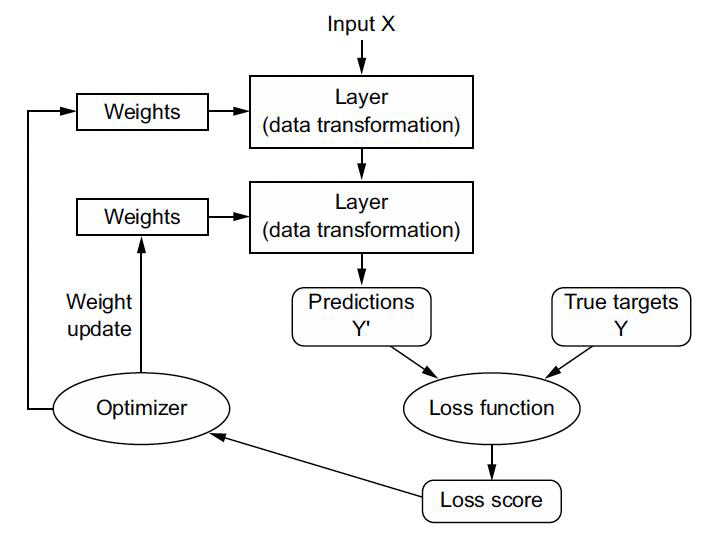

In Training Phase, iterate over a batch of images in the train_loader. For each batch, perform  the following steps:

* First zero out the gradients using zero_grad()

* Pass the data to the model i.e. perform forward pass by calling the forward()

* Calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In [45]:
# Define the number of epochs, which determines how many times the entire training dataset will pass through the model.
epoch = 2

# Set the model to training mode.
# This is necessary because certain layers (e.g., dropout, batch normalization) behave differently during training and inference.
vision_model.train()

# Initialize lists to keep track of training losses and accuracy across epochs.
train_losses = []
train_accuracy = []

# Loop over the number of epochs
for e in range(epoch):
    train_loss = 0    # Initialize the training loss for the current epoch.
    correct = 0       # Initialize the count of correct predictions for the current epoch.

    # Iterate over all batches of images and labels from the training DataLoader.
    for images, labels in train_loader:

        # Move the images and labels to the specified device (GPU or CPU) for faster computation.
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients to ensure they don't accumulate over iterations.
        optimizer.zero_grad()

        # Perform the forward pass: pass the images through the model to get the outputs (predictions).
        outputs = vision_model(images)

        # Compute the loss by comparing the model's outputs with the true labels.
        loss = criterion(outputs, labels)
        
        # Accumulate the loss for the current batch to track the total loss for the epoch.
        train_loss += loss.item()

        # Perform the backward pass: compute the gradients of the loss with respect to model parameters.
        loss.backward()

        # Update the model parameters based on the gradients computed during backpropagation.
        optimizer.step()

        # Get the predicted class by taking the index of the maximum logit in the outputs.
        _, predicted = torch.max(outputs, 1)
        
        # Increment the correct predictions count by comparing the predicted labels with the true labels.
        correct += (predicted == labels).sum().item()

    # Calculate and store the average training loss for the current epoch.
    train_losses.append(train_loss / len(mnist_trainset))

    # Calculate and store the training accuracy for the current epoch.
    train_accuracy.append(100 * correct / len(mnist_trainset))

    # Print the epoch number, average training loss, and training accuracy for the current epoch.
    print('epoch: {}, Train Loss: {:.6f} Train Accuracy: {:.2f}% '.format(e + 1, train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss: 0.016399 Train Accuracy: 89.70% 
epoch: 2, Train Loss: 0.008140 Train Accuracy: 94.98% 


In Testing Phase, iterate over a batch of images in the test_loader. For each batch, perform the following steps:

* Pass the images through the model (network) to get the outputs
* Pick the class / label with the highest probability
* Calculate the accuracy

In [46]:
# Put the model in evaluation mode.
# This disables certain layers that behave differently during training, such as dropout and batch normalization.
vision_model.eval()

# Initialize a variable to accumulate the correct predictions across all test batches.
Test_accuracy = 0

# Iterate over all batches in the test DataLoader.
for images, labels in test_loader:

    # Move the images and labels to the specified device (usually GPU) for faster computation.
    images = images.to(device)
    labels = labels.to(device)

    # Perform the forward pass: pass the images through the model to get the outputs (predictions).
    outputs = vision_model(images)

    # Get the predicted class by taking the index of the maximum logit in the outputs.
    _, predicted = torch.max(outputs, 1)

    # Compare the predicted labels with the true labels and sum up the number of correct predictions.
    Test_accuracy += (predicted == labels).sum().item()

# Calculate and print the overall test accuracy.
# The accuracy is computed as the percentage of correct predictions out of the total number of test samples.
print('Test Accuracy: {:.2f}%'.format(100 * Test_accuracy / len(mnist_testset)))

Test Accuracy: 95.82%


## Transfer Learning with Pretrained Models

#### Introduction to Transfer Learning

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. This is especially useful in deep learning where training models from scratch can be computationally expensive and require large amounts of data. Instead of training a model from the ground up, transfer learning leverages the knowledge acquired by a pre-trained model on a large dataset, transferring this knowledge to a new, related task.

#### How Transfer Learning Works

1. **Pre-training**: A model is first trained on a large and diverse dataset. For instance, models like VGG, ResNet, and BERT are pre-trained on datasets such as ImageNet for image tasks and large corpora of text for NLP tasks.
2. **Fine-tuning**: The pre-trained model is then fine-tuned on the specific dataset of the target task. This involves either:
   - Using the pre-trained model as a fixed feature extractor, where the pre-trained layers are frozen, and only the final layer(s) are trained.
   - Unfreezing some of the pre-trained layers and training them along with the final layers to adapt the model more closely to the new task.

#### Benefits of Using Pre-trained Models

1. **Reduced Training Time**: Pre-trained models significantly cut down the time required to train a model. Since the pre-trained model has already learned a lot of features, the training process focuses on fine-tuning these features rather than learning from scratch.

2. **Improved Performance**: Models pre-trained on large datasets typically capture a wide variety of features that can be beneficial for the target task. This usually results in better performance compared to models trained from scratch, especially when the target dataset is small.

3. **Data Efficiency**: Transfer learning is particularly valuable when the target task has limited data. The pre-trained model can generalize better from limited data, leveraging the knowledge it gained from the large pre-training dataset.

4. **Overfitting Prevention**: Pre-trained models, having been exposed to a large amount of diverse data, are less prone to overfitting on small datasets. This helps in creating more robust models.

5. **Access to Advanced Architectures**: Utilizing pre-trained models often means leveraging advanced model architectures that have been extensively tested and validated by the research community. This provides a strong starting point for building state-of-the-art solutions.

#### Examples in Practice

1. **Image Classification**: Transfer learning is widely used in image classification tasks. Models pre-trained on the ImageNet dataset are commonly used as the basis for tasks involving medical imaging, object detection, and more.

2. **Natural Language Processing (NLP)**: In NLP, models like BERT, GPT, and T5, pre-trained on massive text corpora, are fine-tuned for specific tasks such as sentiment analysis, named entity recognition, and question answering.

3. **Speech Recognition**: Models pre-trained on large speech datasets are fine-tuned for specific applications like voice assistants, transcription services, and more.

Transfer learning, particularly with pre-trained models, offers a powerful approach to machine learning by leveraging existing knowledge to tackle new problems efficiently and effectively. By reducing training time, improving performance, enhancing data efficiency, preventing overfitting, and providing access to advanced architectures, transfer learning enables practitioners to develop high-performing models even with limited resources.

### Visualizing one image from the test dataset

In [47]:
# Iterate through the testloader and extract one image and label
for images, labels in test_loader:
  image = images[0]  # Take the first image from the batch
  label = labels[0]  # Take the corresponding label
  break  # Exit the loop after extracting one sample

# Print the shape of the image and the label
print("Image shape:", image.shape)
print("Label:", label)

Image shape: torch.Size([1, 28, 28])
Label: tensor(5)


In [48]:
# Reshape the image to [1, 1, 28, 28]
image_reshaped = image.unsqueeze(0)  # Add a batch dimension
print("Reshaped image shape:", image_reshaped.shape)

Reshaped image shape: torch.Size([1, 1, 28, 28])


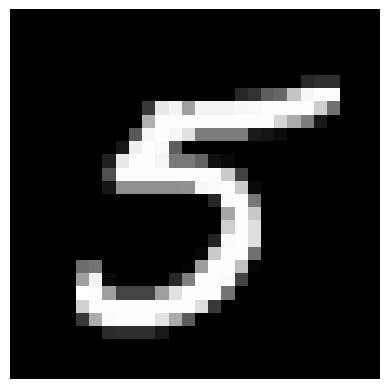

In [49]:
# Convert the tensor to numpy for displaying the image
# Remove batch dimension and convert to numpy

image_numpy = image_reshaped.squeeze().detach().numpy()

# Display the image
plt.imshow(image_numpy, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

### Load ResNet50 model and fine-tune it

In [50]:
from torchvision import models
from torchvision.models import ResNet50_Weights

# Load the pretrained ResNet50 model using the updated weights parameter
# model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Alternatively, you can use the most up-to-date weights with:
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)

In [51]:
# Get the number of input features to the final fully connected (fc) layer of the model.
# ResNet's final fully connected layer expects a certain number of input features.
num_ftrs = model.fc.in_features

# Replace the final fully connected layer of the model with a new one that has 10 output features.
# This is because the Fashion MNIST dataset has 10 classes.
# nn.Linear(num_ftrs, 10) creates a linear layer with 'num_ftrs' input features and 10 output features (one for each class).
model.fc = nn.Linear(num_ftrs, 10)

# Move the entire model to the specified device (GPU if available, otherwise CPU).
# This step ensures that all model operations, including forward and backward passes, are executed on the device for faster computation.
model = model.to(device)

# Define the loss function, which will be used to compute the error between the model's predictions and the actual labels.
# CrossEntropyLoss is suitable for classification tasks where the output is a class label.
criterion = nn.CrossEntropyLoss()

# Define the optimizer, which will update the model's parameters during training to minimize the loss.
# Adam is an optimization algorithm that adjusts the learning rate for each parameter based on the first and second moments of the gradients.
# The learning rate is set to 0.001, which controls the size of the steps the optimizer takes during each update.
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training is expected to take time

In [55]:
# Define the number of epochs for training.
epoch = 2

# Set the model to training mode.
# This is necessary because certain layers, like dropout and batch normalization, behave differently during training and evaluation.
model.train()

# Initialize lists to keep track of training losses and accuracy across epochs.
train_losses = []
train_accuracy = []

# Loop over the number of epochs.
for e in range(epoch):
    train_loss = 0    # Initialize the training loss for the current epoch.
    correct = 0       # Initialize the count of correct predictions for the current epoch.

    # Iterate over all batches of images and labels from the training DataLoader.
    for images, labels in train_loader:

        # Resize the images to 224x224 pixels to match the input size expected by ResNet50.
        resize_transform = transforms.Resize((224, 224))
        resized_image = resize_transform(images)

        # Repeat the single channel (grayscale) image across 3 channels to match the 3-channel (RGB) input expected by ResNet50.
        resized_image = resized_image.repeat(1, 3, 1, 1)

        # Move the images and labels to the specified device (GPU if available) for faster computation.
        images = resized_image.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients to ensure they don't accumulate over iterations.
        optimizer.zero_grad()

        # Perform the forward pass: pass the images through the model to get the outputs (predictions).
        outputs = model(images)

        # Compute the loss by comparing the model's outputs with the true labels.
        loss = criterion(outputs, labels)

        # Accumulate the loss for the current batch to track the total loss for the epoch.
        train_loss += loss.item()

        # Perform the backward pass: compute the gradients of the loss with respect to model parameters.
        loss.backward()

        # Update the model parameters based on the gradients computed during backpropagation.
        optimizer.step()

        # Get the predicted class by taking the index of the maximum logit in the outputs.
        _, predicted = torch.max(outputs, 1)

        # Increment the correct predictions count by comparing the predicted labels with the true labels.
        correct += (predicted == labels).sum().item()

    # Calculate and store the average training loss for the current epoch.
    train_losses.append(train_loss / len(mnist_trainset))

    # Calculate and store the training accuracy for the current epoch.
    train_accuracy.append(100 * correct / len(mnist_trainset))

    # Print the epoch number, average training loss, and training accuracy for the current epoch.
    print('epoch: {}, Train Loss: {:.6f} Train Accuracy: {:.2f}% '.format(e + 1, train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss: 0.003843 Train Accuracy: 97.71% 
epoch: 2, Train Loss: 0.002246 Train Accuracy: 98.59% 


In [56]:
# Set the model to evaluation mode.
# This disables certain layers that behave differently during training, such as dropout and batch normalization.
vision_model.eval()

# Initialize a variable to accumulate the correct predictions across all test batches.
Test_accuracy = 0

# Loop through the test data in batches.
for images, labels in test_loader:

    # Resize the test images to 224x224 pixels to match the input size expected by ResNet50.
    resize_transform = transforms.Resize((224, 224))
    resized_image = resize_transform(images)

    # Repeat the single channel (grayscale) image across 3 channels to match the 3-channel (RGB) input expected by ResNet50.
    resized_image = resized_image.repeat(1, 3, 1, 1)

    # Move the images and labels to the specified device (GPU if available) for faster computation.
    images = resized_image.to(device)
    labels = labels.to(device)

    # Perform the forward pass: pass the images through the model to get the outputs (predictions).
    outputs = model(images)

    # Get the predicted class by taking the index of the maximum logit in the outputs.
    _, predicted = torch.max(outputs, 1)

    # Increment the correct predictions count by comparing the predicted labels with the true labels.
    Test_accuracy += (predicted == labels).sum().item()

# Calculate the overall accuracy of the model on the test dataset.
Accuracy = 100 * Test_accuracy / len(mnist_testset)

# Print the accuracy of the model on the test dataset.
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 98.72
